# Import

In [1]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary


In [2]:
try:
    import wandb
except:
    !pip install wandb
    import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import pandas as pd
import seaborn as sns
import os
from pathlib import Path
import re
import random
import matplotlib.pyplot as plt
import math
import torch

from PIL import Image
from pandas import DataFrame
from typing import Tuple, Dict, List
from torch.utils.data import Dataset, DataLoader

"""
Contains functions for training and testing a PyTorch model.
"""
from torchinfo import summary
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim

In [4]:
import pandas as pd
import seaborn as sns
import os

import requests
import zipfile
from pathlib import Path
from tqdm import tqdm

# Directory

In [5]:
# Setup path to data folder
data_path = Path.cwd()
image_path = data_path / 'NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data'

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    url = "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/bbmmm4wgr8-4.zip"
    response = requests.get(url, stream=True)
    total_size = int(response.headers.get('content-length', 0))

    print(f"Downloading data ({total_size / 1024 / 1024:.2f} MBs)...")

    with open(data_path / "NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data.zip", "wb") as f, tqdm(unit="B", unit_scale=True, unit_divisor=1024, total=total_size, desc="Downloading", bar_format="{percentage:.2f}%|{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]") as progress:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
                progress.update(len(chunk))

    print("\nData successfully downloaded.")

    print("Extracting data...")
    with zipfile.ZipFile(data_path / "NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data.zip", "r") as zip_ref:
        zip_ref.extractall(data_path)

    print("Data successfully extracted.")

Did not find /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data directory, creating one...


100.00%|██████████| 2.98G/2.98G [02:24<00:00, 22.1MB/s]



Data successfully downloaded.
Extracting data...
Data successfully extracted.


In [6]:
# Setup path for target directory
target_directory = image_path / 'patch'
print(f"Target directory: {target_directory}")

Target directory: /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch


In [7]:
with zipfile.ZipFile(target_directory/'images-patches.zip', "r") as zip_ref:
        print("Unzipping data...")
        zip_ref.extractall(data_path)

Unzipping data...


In [8]:
zip_path = target_directory/'images-patches.zip'

In [9]:
#!unzip "/content/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/images-patches.zip" -d "/content/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch"

In [10]:
!unzip "/kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/images-patches.zip" -d "/kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch"

Archive:  /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/images-patches.zip
   creating: /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/patch/
   creating: /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/patch/patch/
  inflating: /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/patch/patch/images-patches.zip  
  inflating: /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/patch/patch/sabpatch_parsed_folders.csv  
  inflating: /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/patch/patch/sabpatch_parsed_test.csv  


In [11]:
#!unzip "/content/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/patch/patch/images-patches.zip" -d "/content/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch"


In [12]:
!unzip "/kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/patch/patch/images-patches.zip" -d "/kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch"

Archive:  /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/patch/patch/images-patches.zip
   creating: /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/images/
  inflating: /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/images/p0008.png  
  inflating: /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/images/p0011.png  
  inflating: /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/images/p0014.png  
  inflating: /kaggle/working/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/images/p0016.png  
  inflating: /kaggle/working/NDB-UFES An oral cancer and leukoplak

In [13]:
image_dir = target_directory / 'images'
train_df = pd.read_csv(target_directory/'sabpatch_parsed_folders.csv')
train_ds = train_df[['path','lesion']]
test_df = pd.read_csv(target_directory/'sabpatch_parsed_test.csv')
test_ds = test_df[['path','lesion']]

# Global Parameters

In [14]:
ALPHA = 0.0001 ## Learning Rate
EPOCH = 50  ## Epochs
BATCH_SIZE = 32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

# Custom Image Dataset

In [15]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
class ImageFolderCustom(Dataset):

    # 1. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self,
                 targ_dir: str,
                 path_df: DataFrame,
                 transform=None) -> None:

        # Get all image paths, classes
        self.img_df = path_df

        # Set all images to proper path
        self.img_df['path'] = self.check_path(targ_dir)

        self.paths = list(self.img_df['path'])

        # Setup transforms
        self.transform = transform

        self.classes, self.class_to_idx = self.find_classes()

    # 2. check if its already in proper format
    def check_path(self,
                   targ_dir: str) -> DataFrame:
        if str(targ_dir) in self.img_df.iloc[0,0]:
            return self.img_df['path'].astype('string')
        else:
            return str(targ_dir)+ '/' +  self.img_df['path'].astype('string')

    # 3. Make function to load images
    def load_image(self,
                   index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.img_df.iloc[index, 0]
        return Image.open(image_path)

    # 4. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return self.img_df.shape[0]

    # 5. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self,
                    index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.img_df.iloc[index, 1] # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)


    def find_classes(self) -> Tuple[List[str], Dict[str, int]]:

        col = self.img_df.columns
        # 1. Get the class names by scanning the target directory
        classes = sorted(self.img_df[col[1]].unique())

        # 2. Raise an error if class names not found
        if not classes:
            raise FileNotFoundError(f"Couldn't find any classes.")

        # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

In [16]:
def create_dataloader(dir,
                      train_ds: DataFrame,
                      test_ds: DataFrame) -> Tuple[DataLoader[float], DataLoader[float], List[str]]:


    # train_transforms = transforms.Compose([
    #     #transforms.Resize((64, 64)),
    #     transforms.RandomHorizontalFlip(p=0.5),
    #     #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    #     transforms.ToTensor()
    # ])


    manual_transforms = transforms.Compose([
        transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
        transforms.ToTensor(), # 2. Turn image values to between 0 & 1
        transforms.Normalize(mean = MEAN, # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std = STD)
    ])



    # test_transforms = transforms.Compose([
    #     #transforms.Resize((64, 64)),
    #     transforms.ToTensor(),
    # ])


    train_data = ImageFolderCustom(targ_dir = dir,
                                          path_df = train_ds,
                                          transform= manual_transforms)

    test_data = ImageFolderCustom(targ_dir = dir,
                                          path_df = test_ds,
                                          transform= manual_transforms)



    classes, class_to_idx = train_data.find_classes()

    # Turn train, test and eval Dataset's into DataLoader's

    train_dataloader = DataLoader(dataset=train_data, # use custom created train Dataset
                                        batch_size=BATCH_SIZE, # how many samples per batch?
                                        num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                        shuffle=True) # shuffle the data?

    test_dataloader = DataLoader(dataset=test_data, # use custom created test Dataset
                                        batch_size=BATCH_SIZE,
                                        num_workers=0,
                                        shuffle=False) # don't usually need to shuffle testing data

    return train_dataloader, test_dataloader, classes

In [17]:
train_dataloader, test_dataloader, classes = create_dataloader(dir=image_dir, train_ds=train_ds, test_ds=test_ds)

/tmp/ipykernel_35/1968766816.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.img_df['path'] = self.check_path(targ_dir)


In [18]:
train_dataloader, test_dataloader, classes

(<torch.utils.data.dataloader.DataLoader at 0x7cf25d4c3820>,
 ['OSCC', 'With dysplasia', 'Without dysplasia'])

# Model Class

In [19]:
class Engine():

    wandb.init(
    project="maxvit_t",
    config={
            "epochs": EPOCH,
            "batch_size": BATCH_SIZE,
            "lr": ALPHA,
            "architecture": "ViT",
            })




    def __init__(self,
                 model,
                 loss_fn,
                 optimizer,
                 device,
                 early_stopping = False):

        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = device

        self.early_stopping = early_stopping
        self.counter = 0
        self.early_stop = False # type: ignore
        self.best_score = None

        # Copy your config
        self.config = wandb.config

    def model_summary(self,
                      input_size,
                      col_width = 20,):

        return summary(self.model,
                input_size = input_size, # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
                col_names = ["input_size", "output_size", "num_params", "trainable"],
                col_width = col_width,
                row_settings = ["var_names"])

    def check_early_stop(self,
                   val_loss,
                   delta,
                   verbose,
                   patience):

        score = -val_loss
        # print(verbose)
        if self.best_score is None:
            self.best_score = score

        elif score < self.best_score + delta:
            self.counter += 1

            if verbose:
                print(f"Early stopping counter: {self.counter} out of {patience}")

            if self.counter >= patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.early_stop = False
            self.counter = 0


    def train_step(self, epoch):

        y_tr_true, y_tr_pred= [], []
        # Put model in train mode
        self.model.train()

        # Setup train loss and train accuracy values
        train_loss, train_acc = 0, 0

        n_steps_per_epoch = math.ceil(len(self.train_dataloader) / self.config.batch_size)

        example_ct = 0
        # Loop through data loader data batches
        for i, data in enumerate(tqdm(self.train_dataloader, desc=f'Epoch {epoch + 1}/{self.epochs}', unit='batch')):
            # Send data to target device
            X_train, y_train = data

            y_tr_true.extend(y_train) # collect all training labels

            X_train = X_train.to(self.device)
            y_train = y_train.to(self.device)

            # 1. Forward pass

            outputs = self.model(X_train)
            _, y_pred = torch.max(outputs, 1) # max along an axis gives both max val as well as index
            y_tr_pred.extend(y_pred.data.cpu())

            # 2. Calculate  and accumulate loss
            loss = self.loss_fn(outputs, y_train)

            train_loss += loss.item()

            # 3. Optimizer zero grad
            self.optimizer.zero_grad()

            # 4. Loss backward
            loss.backward()

            # 5. Optimizer step
            self.optimizer.step()


        # Adjust metrics to get average loss and accuracy per batch
        train_loss /= len(self.train_dataloader)
        train_acc = accuracy_score(y_tr_true, y_tr_pred)



        # Log Training info in W&B
        metrics ={
                      "train/train_loss": train_loss,
                      "train/epoch": (i + 1 + (n_steps_per_epoch * epoch)) / n_steps_per_epoch,
                      "train/train_acc": train_acc,
                  }

        wandb.log(metrics)

        return train_loss, train_acc


    def test_step(self, epoch):

        y_ts_true,  y_ts_pred = [], []

        # Put model in eval mode

        self.model.eval()

        # Setup test loss and test accuracy values
        test_loss, test_acc = 0, 0

        # Turn on inference context manager
        with torch.inference_mode():
            # Loop through DataLoader batches
            for i, data in enumerate(tqdm(self.test_dataloader, desc=f'Epoch {epoch + 1}/{self.epochs}', unit='batch')):
                # Send data to target device
                X_test, y_test = data
                y_ts_true.extend(y_test) # collect all training labels

                y_test = y_test.to(self.device)
                X_test = X_test.to(self.device)

                # 1. Forward pass
                outputs = self.model(X_test)
                _, y_pred = torch.max(outputs, 1) # max along an axis gives both max val as well as index

                y_ts_pred.extend(y_pred.data.cpu())

                # 2. Calculate and accumulate loss
                loss = self.loss_fn(outputs, y_test)
                test_loss += loss.item()

                # Calculate and accumulate accuracy


        # Adjust metrics to get average loss and accuracy per batch
        test_loss/= len(self.test_dataloader)
        test_acc = accuracy_score(y_ts_true, y_ts_pred)



        # Log Testing info in W&B
        metrics ={
                  "test/test_loss": test_loss,
                  "test/test_acc": test_acc,
                  }

        wandb.log(metrics)

        return test_loss, test_acc


    def train(self,
              train_dataloader,
              test_dataloader,
              epochs=1,
              delta = 0,
              patience = 10,
              verbose = False):

        self.epochs = epochs
        self.train_dataloader = train_dataloader
        self.test_dataloader = test_dataloader


        # Create empty results dictionary
        results = {"epoch":[],
                "train_loss": [],
                "train_acc": [],
                "test_loss": [],
                "test_acc": []
        }

        # Make sure model on target device
        self.model.to(self.device)

        # Loop through training and testing steps for a number of epochs
        for epoch in range(self.epochs):
            train_loss, train_acc = self.train_step(epoch)
            test_loss, test_acc = self.test_step(epoch)

            # Print out what's happening
            print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
            )

            # Update results dictionary
            results["epoch"].append(epoch+1)
            results["train_loss"].append(train_loss)
            results["test_loss"].append(test_loss)
            results["train_acc"].append(train_acc)
            results["test_acc"].append(test_acc)



            if self.early_stopping:
                self.check_early_stop(test_loss, delta, verbose, patience)
                if self.early_stop:
                    print("Early Stopping")
                    break

        # Mark the run as finished
        wandb.finish()
        # Return the filled results at the end of the epochs
        return results


wandb: Currently logged in as: viraj08. Use `wandb login --relogin` to force relogin


In [20]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
import torchvision
from torchvision import transforms
from typing import Tuple, Dict, List

# Train

In [21]:
# model = models.resnet50(pretrained=True).to(device)
model = torchvision.models.maxvit_t(weights=True)

# for param in model.parameters():
#     param.requires_grad = False

model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 3)).to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaxVit_T_Weights.IMAGENET1K_V1`. You can also use `weights=MaxVit_T_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Downloading: "https://download.pytorch.org/models/maxvit_t-bc5ab103.pth" to /root/.cache/torch/hub/checkpoints/maxvit_t-bc5ab103.pth
100%|██████████| 119M/119M [00:00<00:00, 138MB/s]  


In [22]:
loss_fn = nn.CrossEntropyLoss(reduction='sum') # computes the cross entropy loss between input logits and target.

optimizer = torch.optim.Adam(model.parameters(), lr = ALPHA)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
Engine = Engine(model=model, loss_fn=loss_fn, optimizer=optimizer, device=device, early_stopping=True)
result = Engine.train(train_dataloader=train_dataloader, test_dataloader=test_dataloader, epochs=EPOCH, verbose=True)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

Epoch 1/50: 100%|██████████| 20/20 [00:09<00:00,  2.20batch/s]


Epoch: 1 | train_loss: 38.8922 | train_acc: 0.5807 | test_loss: 18.7329 | test_acc: 0.7368


Epoch 2/50: 100%|██████████| 20/20 [00:08<00:00,  2.24batch/s]


Epoch: 2 | train_loss: 17.7083 | train_acc: 0.7631 | test_loss: 14.1079 | test_acc: 0.8166


Epoch 3/50: 100%|██████████| 20/20 [00:08<00:00,  2.23batch/s]


Epoch: 3 | train_loss: 12.6231 | train_acc: 0.8406 | test_loss: 10.3766 | test_acc: 0.8612


Epoch 4/50: 100%|██████████| 20/20 [00:08<00:00,  2.22batch/s]


Epoch: 4 | train_loss: 9.1173 | train_acc: 0.8852 | test_loss: 9.5164 | test_acc: 0.8708


Epoch 5/50: 100%|██████████| 20/20 [00:09<00:00,  2.22batch/s]


Epoch: 5 | train_loss: 6.7280 | train_acc: 0.9174 | test_loss: 13.1926 | test_acc: 0.8357
Early stopping counter: 1 out of 10


Epoch 6/50: 100%|██████████| 20/20 [00:08<00:00,  2.22batch/s]


Epoch: 6 | train_loss: 4.7032 | train_acc: 0.9455 | test_loss: 10.4356 | test_acc: 0.8852
Early stopping counter: 2 out of 10


Epoch 7/50: 100%|██████████| 20/20 [00:08<00:00,  2.24batch/s]


Epoch: 7 | train_loss: 3.0520 | train_acc: 0.9646 | test_loss: 11.0131 | test_acc: 0.8931
Early stopping counter: 3 out of 10


Epoch 8/50: 100%|██████████| 20/20 [00:08<00:00,  2.24batch/s]


Epoch: 8 | train_loss: 2.8387 | train_acc: 0.9716 | test_loss: 11.8744 | test_acc: 0.8868
Early stopping counter: 4 out of 10


Epoch 9/50: 100%|██████████| 20/20 [00:08<00:00,  2.23batch/s]


Epoch: 9 | train_loss: 2.0855 | train_acc: 0.9745 | test_loss: 9.3994 | test_acc: 0.9107


Epoch 10/50: 100%|██████████| 20/20 [00:09<00:00,  2.21batch/s]


Epoch: 10 | train_loss: 1.9158 | train_acc: 0.9799 | test_loss: 9.6291 | test_acc: 0.9059
Early stopping counter: 1 out of 10


Epoch 11/50: 100%|██████████| 20/20 [00:09<00:00,  2.21batch/s]


Epoch: 11 | train_loss: 1.5879 | train_acc: 0.9812 | test_loss: 13.3764 | test_acc: 0.8772
Early stopping counter: 2 out of 10


Epoch 12/50: 100%|██████████| 20/20 [00:08<00:00,  2.24batch/s]


Epoch: 12 | train_loss: 1.5930 | train_acc: 0.9809 | test_loss: 10.1674 | test_acc: 0.9027
Early stopping counter: 3 out of 10


Epoch 13/50: 100%|██████████| 20/20 [00:09<00:00,  2.22batch/s]


Epoch: 13 | train_loss: 0.9514 | train_acc: 0.9911 | test_loss: 13.8208 | test_acc: 0.9027
Early stopping counter: 4 out of 10


Epoch 14/50: 100%|██████████| 20/20 [00:09<00:00,  2.22batch/s]


Epoch: 14 | train_loss: 0.9674 | train_acc: 0.9895 | test_loss: 13.3214 | test_acc: 0.8931
Early stopping counter: 5 out of 10


Epoch 15/50: 100%|██████████| 20/20 [00:09<00:00,  2.20batch/s]


Epoch: 15 | train_loss: 1.7449 | train_acc: 0.9818 | test_loss: 11.8479 | test_acc: 0.8979
Early stopping counter: 6 out of 10


Epoch 16/50: 100%|██████████| 20/20 [00:09<00:00,  2.20batch/s]


Epoch: 16 | train_loss: 1.1658 | train_acc: 0.9876 | test_loss: 11.6096 | test_acc: 0.9075
Early stopping counter: 7 out of 10


Epoch 17/50: 100%|██████████| 20/20 [00:09<00:00,  2.20batch/s]


Epoch: 17 | train_loss: 1.0654 | train_acc: 0.9892 | test_loss: 12.8096 | test_acc: 0.9075
Early stopping counter: 8 out of 10


Epoch 18/50: 100%|██████████| 20/20 [00:09<00:00,  2.21batch/s]


Epoch: 18 | train_loss: 0.8041 | train_acc: 0.9917 | test_loss: 15.1342 | test_acc: 0.8947
Early stopping counter: 9 out of 10


Epoch 19/50: 100%|██████████| 20/20 [00:09<00:00,  2.20batch/s]


Epoch: 19 | train_loss: 1.2133 | train_acc: 0.9863 | test_loss: 14.9254 | test_acc: 0.9059
Early stopping counter: 10 out of 10
Early Stopping


test/test_acc,▁▄▆▆▅▇▇▇██▇██▇▇██▇█
test/test_loss,█▅▂▁▄▂▂▃▁▁▄▂▄▄▃▃▄▅▅
train/epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
train/train_acc,▁▄▅▆▇▇█████████████
train/train_loss,█▄▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
test/test_acc,0.9059
test/test_loss,14.92535
train/epoch,42.5
train/train_acc,0.98629
train/train_loss,1.21327


[INFO] Total training time: 1198.249 seconds


In [23]:
type(model), type(loss_fn), type(optimizer)

(torchvision.models.maxvit.MaxVit,
 torch.nn.modules.loss.CrossEntropyLoss,
 torch.optim.adam.Adam)

In [24]:
result_df = pd.DataFrame(result)
result_df.head()

,epoch,train_loss,train_acc,test_loss,test_acc
0,1,38.892173,0.580676,18.732873,0.736842
1,2,17.708343,0.763074,14.107876,0.816587
2,3,12.623129,0.840561,10.376644,0.861244
3,4,9.117326,0.885204,9.516413,0.870813
4,5,6.727983,0.917411,13.192574,0.835726


In [25]:
result_df.shape

(19, 5)

In [26]:
# # parameters for Matplotlib
# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 10),
#           'axes.labelsize': 'x-large',
#           'axes.titlesize':'x-large',
#           'xtick.labelsize':'x-large',
#           'ytick.labelsize':'x-large'
#          }

# CMAP = plt.cm.coolwarm

# plt.rcParams.update(params)

# Plot hist

In [27]:
###-----------------------------------
### Function to plot Loss Curve
###-----------------------------------

def plot_torch_hist(hist_df : pd.DataFrame):
    '''
    Args:
      hist_df : pandas Dataframe with five columns
                First column need to be epoch, 'x' values
    '''
    # instantiate figure
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    facecolor = 'cyan'
    fontsize=12

    # Get columns by index to eliminate any column naming error
    x = "epoch"
    y1 = "train_loss"
    y2 = "test_loss"
    y3 = "train_acc"
    y4 = "test_acc"


    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor=facecolor, alpha=0.5)

    # Where was min loss
    best = hist_df[hist_df[y2] == hist_df[y2].min()]

    # pick first axis
    ax = axes[0]

    # Plot all losses
    hist_df.plot(x = x, y = [y1,y2], ax = ax)

    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y2]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr,
            transform=ax.transAxes,
            fontsize=fontsize,
            verticalalignment='top',
            bbox=props)

    # Mark arrow at lowest
    offset = (best[y2].max() - best[y2].max())/10
    ax.annotate(f'Min: {best[y2].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y2].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()-2, best[y2].to_numpy()[0]+offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best[x].to_numpy(),
               color = 'green',
               linestyle='-.', lw = 3);

    ax.set_xlabel(x.capitalize())
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid()
    ax.legend(loc = 'upper left') # model legend to upper left

    # pick second axis
    ax = axes[1]

    # Plot accuracy
    hist_df.plot(x = x, y = [y3, y4], ax = ax)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y3],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in lower middle in axes coords
    ax.text(0.3, 0.2, txtstr,
            transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    offset = (best[y4].max() - best[y4].min())/10
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()-2, best[y4].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw a vertical line at best value
    ax.axvline(x = best[x].to_numpy(),
               color = 'green',
               linestyle='-.', lw = 3)

    # Labels
    ax.set_xlabel(x.capitalize())
    ax.set_ylabel(y3.capitalize())
    ax.set_title('Accuracies')
    ax.grid();
    ax.legend(loc = 'lower left')

    plt.tight_layout()




    # pick first axis
    ax = axes[0]

    # Plot all losses
    hist_df.plot(x = x, y = [y1,y2], ax = ax)

    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y2]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr,
            transform=ax.transAxes,
            fontsize=fontsize,
            verticalalignment='top',
            bbox=props)

    # Mark arrow at lowest
    offset = (best[y2].max() - best[y2].max())/10
    ax.annotate(f'Min: {best[y2].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y2].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()-2, best[y2].to_numpy()[0]+offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best[x].to_numpy(),
               color = 'green',
               linestyle='-.', lw = 3);

    ax.set_xlabel(x.capitalize())
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid()
    ax.legend(loc = 'upper left') # model legend to upper left

    # pick second axis
    ax = axes[1]

    # Plot accuracy
    hist_df.plot(x = x, y = [y3, y4], ax = ax)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y3],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in lower middle in axes coords
    ax.text(0.3, 0.2, txtstr,
            transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    offset = (best[y4].max() - best[y4].min())/10
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()-2, best[y4].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw a vertical line at best value
    ax.axvline(x = best[x].to_numpy(),
               color = 'green',
               linestyle='-.', lw = 3)

    # Labels
    ax.set_xlabel(x.capitalize())
    ax.set_ylabel(y3.capitalize())
    ax.set_title('Accuracies')
    ax.grid();
    ax.legend(loc = 'lower left')

    plt.tight_layout()

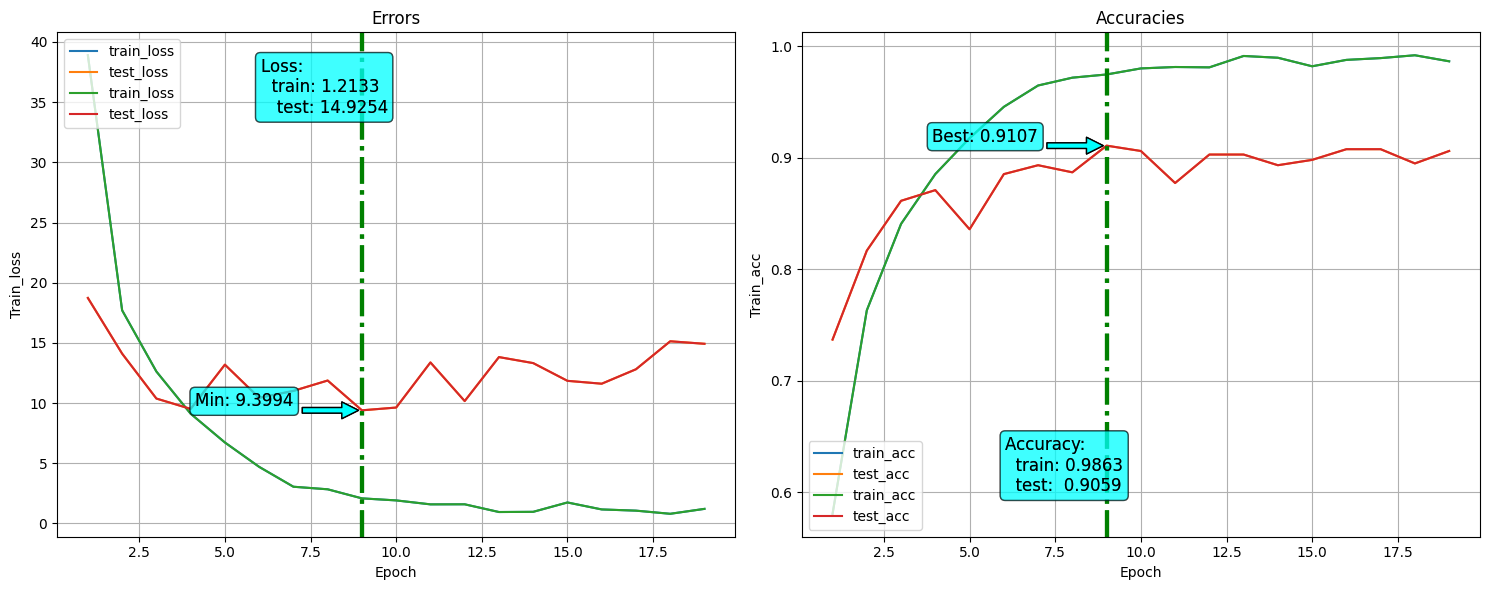

In [28]:
plot_torch_hist(result_df)